<a href="https://colab.research.google.com/github/konarksharma2001/Machine-Learning/blob/main/KNN_Classification_on_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df =  pd.read_csv('iris.csv')

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


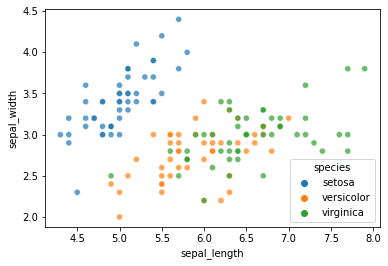

In [12]:
sns.scatterplot(x='sepal_length', y='sepal_width',hue='species',data = df,alpha=0.7)

(2.5, 4.0)

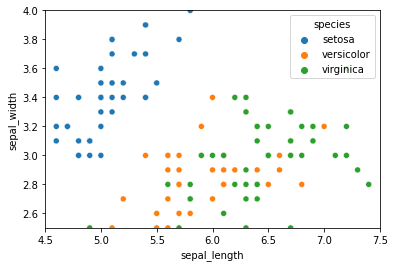

In [13]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.xlim(4.5,7.5)
plt.ylim(2.5,4)

###Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X = df.drop('species',axis=1)
y = df['species']

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

###Training KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

###Choosing K Value

In [24]:
full_test = pd.concat([X_test, y_test], axis =1)

In [25]:
len(full_test)

45

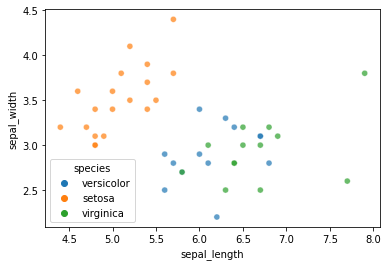

In [26]:
sns.scatterplot(x = 'sepal_length',y = 'sepal_width',hue = 'species',data = full_test,alpha=0.7,)

###Model Evaluation

In [27]:
y_pred = knn_model.predict(scaled_X_test)

In [28]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [30]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [31]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



###Elbow Method for Choosing Reasonable K Values

In [39]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

print(test_error_rates)

[0.022222222222222254, 0.022222222222222254, 0.0, 0.022222222222222254, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.022222222222222254, 0.0, 0.0, 0.0, 0.0, 0.0, 0.022222222222222254, 0.0444444444444444, 0.0444444444444444, 0.0444444444444444, 0.06666666666666665, 0.0888888888888889]


Text(0.5, 0, 'K Value')

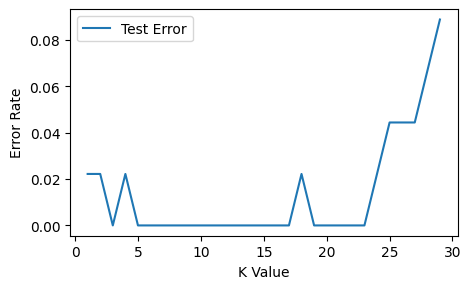

In [40]:
plt.figure(figsize=(5,3),dpi=100)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')